In [39]:
import torchvision
weights = torchvision.models.AlexNet_Weights.DEFAULT
model = torchvision.models.alexnet().to("cuda")

In [40]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [41]:
import torch.nn as nn

model.classifier[6] = nn.Linear(4096, 10)
model.to("cuda")

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [42]:
from torchsummary import summary
help(summary)
import torchvision.models as models
alexnet = models.alexnet(pretrained=False)
alexnet.cuda()
summary(alexnet, (3, 224, 224))
print(alexnet)

Help on function summary in module torchsummary.torchsummary:

summary(model, input_size, batch_size=-1, device='cuda')



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [43]:
import torchvision.transforms as transforms

transforms = transforms.Compose([
     transforms.Resize((224, 224)),
    transforms.CenterCrop(224),  # or transforms.RandomCrop(224) for data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [44]:
import torch

train_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    transform=transforms,
    download=True
)
test_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    transform=transforms,
    download=True,
)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=True
)

100%|██████████| 170498071/170498071 [00:05<00:00, 32449203.62it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


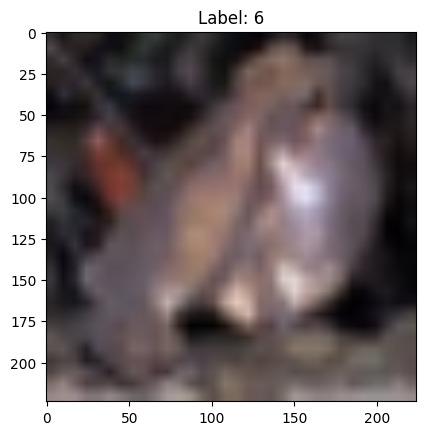

In [45]:
# Display image and label.
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(train_dataloader))
# Display the first image in the batch
img = train_features[0].permute(1, 2, 0)  # Change the order of dimensions to (height, width, channels)
label = train_labels[0]

# Denormalize the image if normalization was applied during preprocessing
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = img * torch.tensor(std) + torch.tensor(mean)
img = torch.clamp(img, 0, 1)  # Clip values to the valid range [0, 1]

# Display the image and label
plt.imshow(img)
plt.title(f"Label: {label.item()}")
plt.show()

In [46]:
len(train_dataloader)

782

In [47]:
EPOCHS = 2
lr = 0.001

device = "cuda" if torch.cuda.is_available() else "cpu"

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(EPOCHS):
  for i, (images, labels) in enumerate(train_dataloader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)

    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 300 == 0:
      print(f"Epoch {epoch+1}/{EPOCHS}, Step {i+1}/{len(train_dataloader)}, Loss: {loss.item()}")

Epoch 1/2, Step 300/782, Loss: 1.7514705657958984
Epoch 1/2, Step 600/782, Loss: 1.4969358444213867
Epoch 2/2, Step 300/782, Loss: 1.5128998756408691
Epoch 2/2, Step 600/782, Loss: 1.6361318826675415


In [49]:
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_dataloader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted==labels).sum().item()
  print(f"Accuracy of the model on test size {total} is {correct/total}")

Accuracy of the model on test size 10000 is 0.4881
